In [1]:
#plt.style.use('dark_background')
# %matplotlib inline
# #%config InlineBackend.figure_format = 'retina'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.size'] = 20
# plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 20
# plt.rcParams['figure.titlesize'] = 22
# plt.rcParams['text.latex.preamble'] = '\\usepackage{amsmath}'
# plt.rcParams['savefig.transparent'] = False

In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ['CUDA_DEVICE'] = str(1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from qd_helpers import *

In [4]:
data = np.load('results.npy')
m, qd_cfg, t, y = data
qdm = QDMeshData((m.pts, m.tris))

In [5]:
slip_to_traction = get_slip_to_traction(qdm, qd_cfg)

[233494:INFO:tectosaur.util.cuda]
    Initialized CUDA on gpu: 1


In [6]:
t_years = np.array(t) / (365.25 * 24 * 60 * 60)
y = np.array(y)

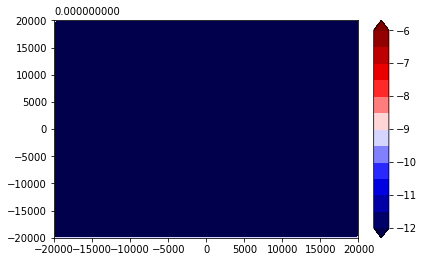

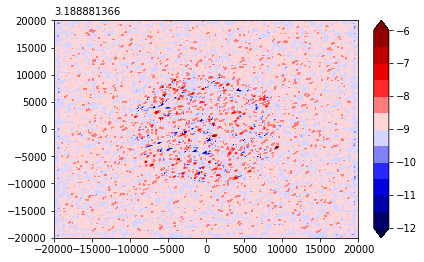

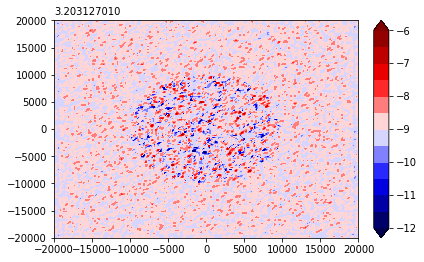

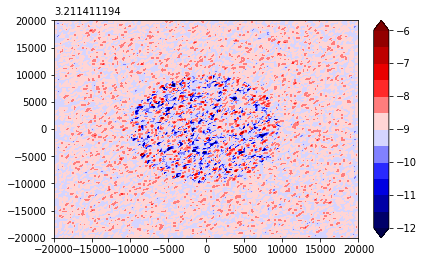

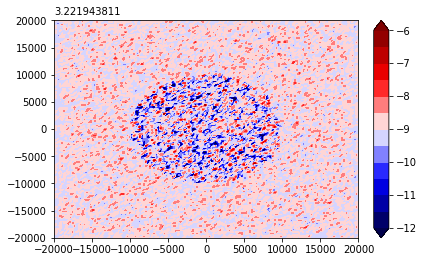

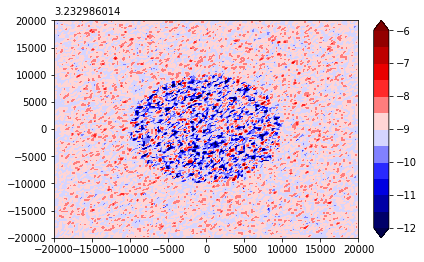

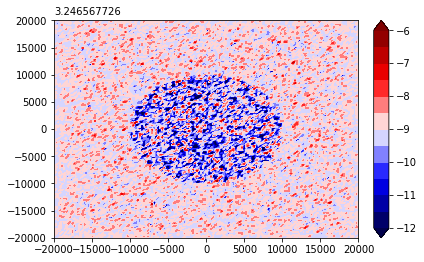

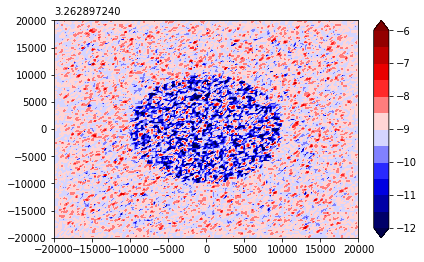

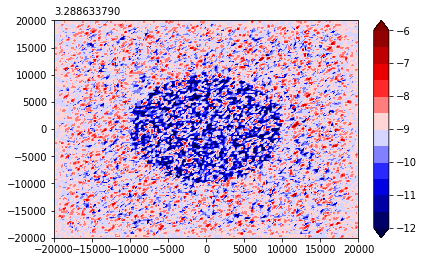

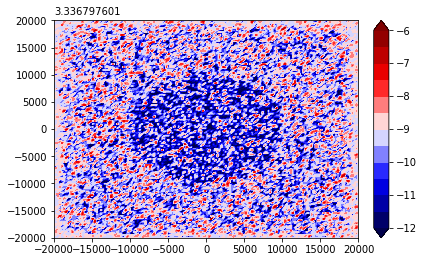

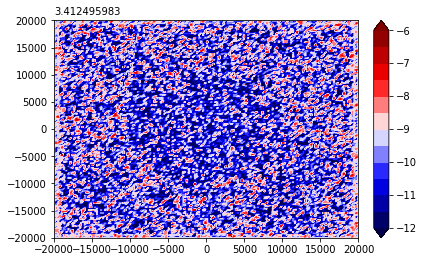

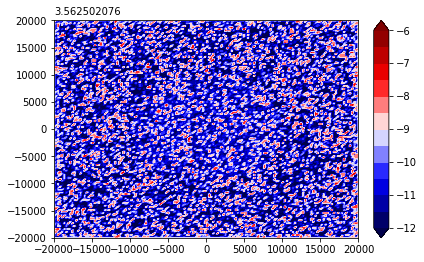

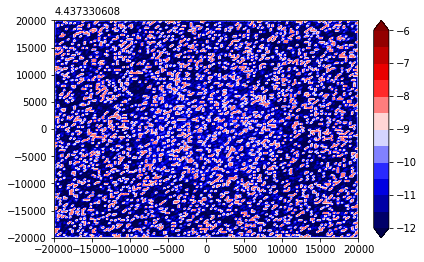

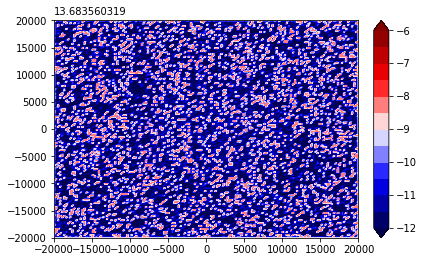

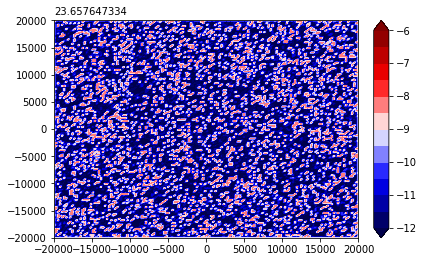

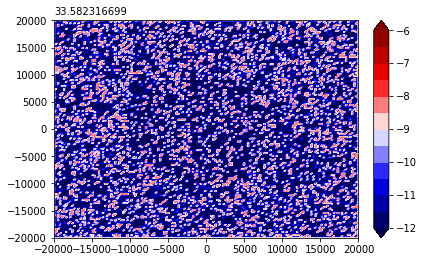

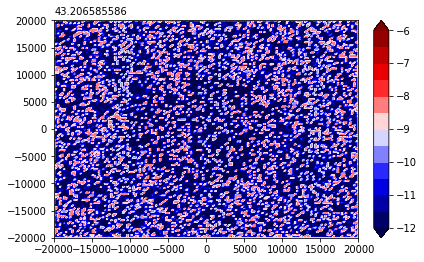

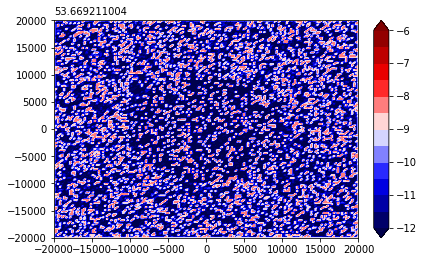

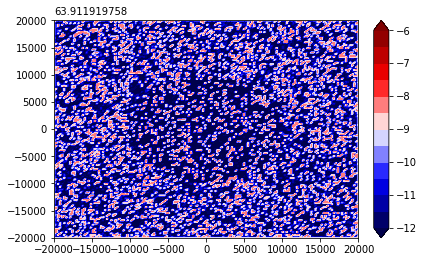

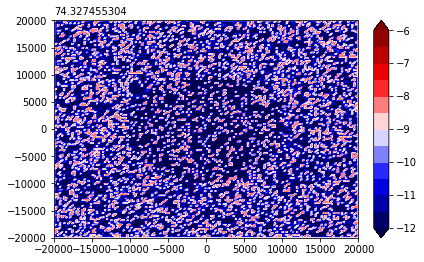

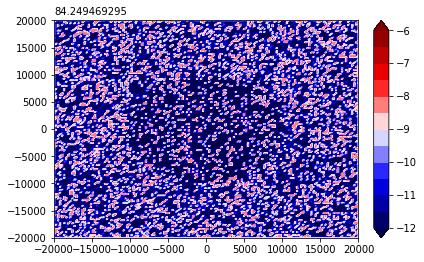

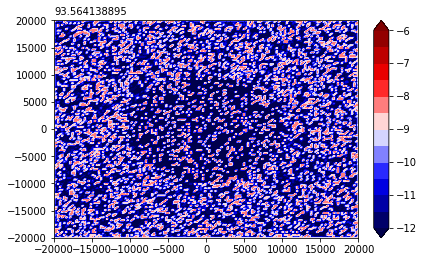

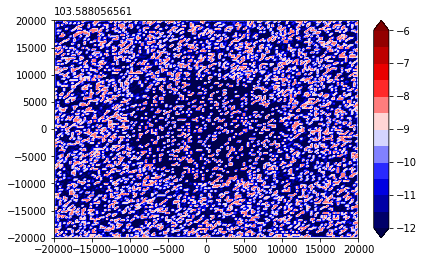

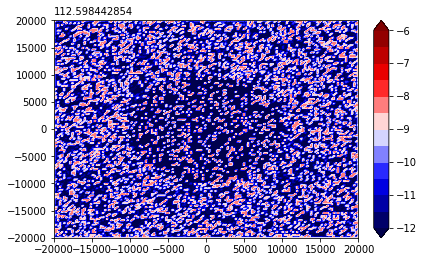

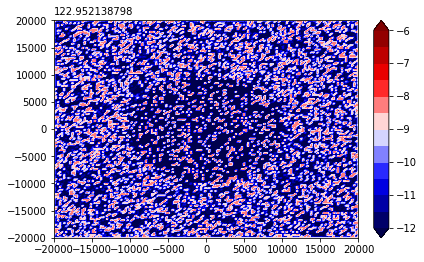

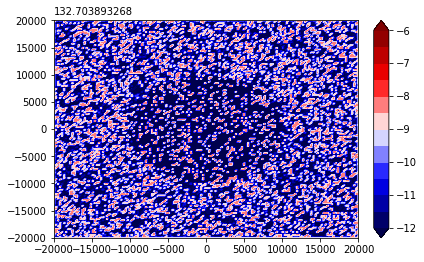

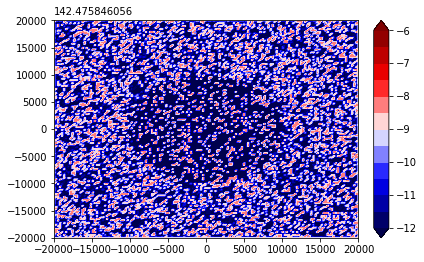

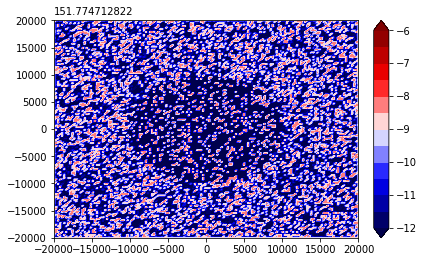

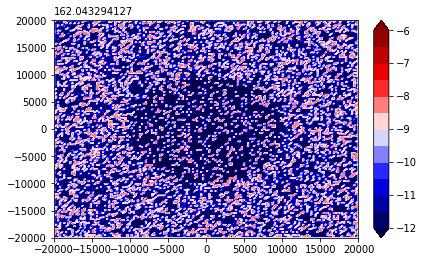

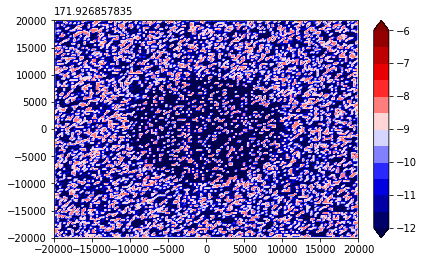

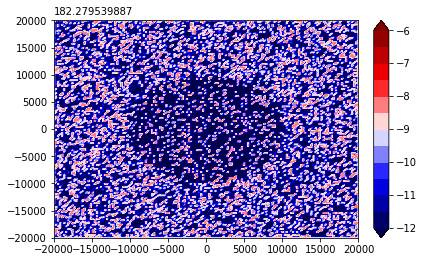

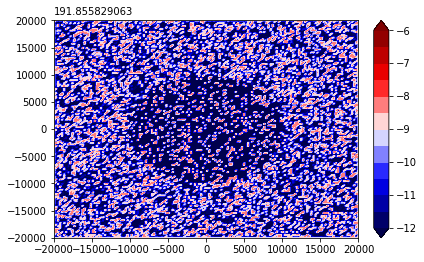

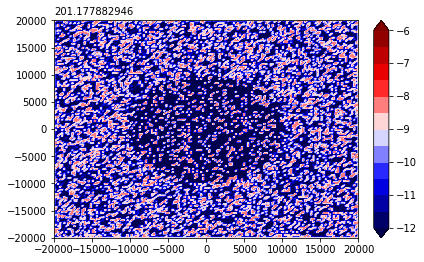

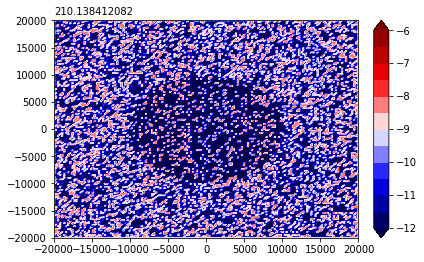

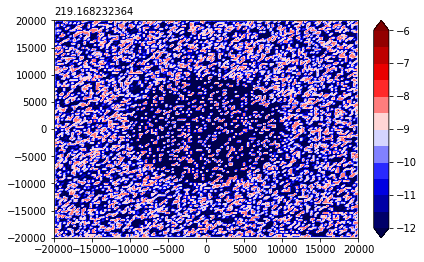

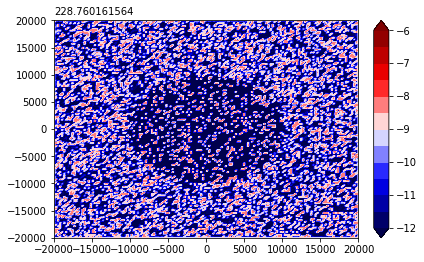

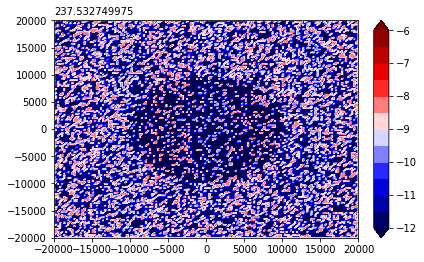

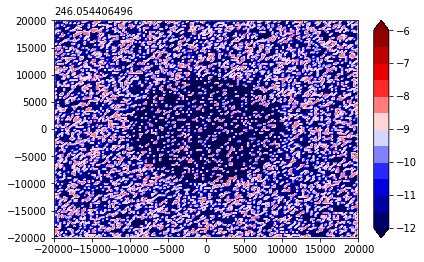

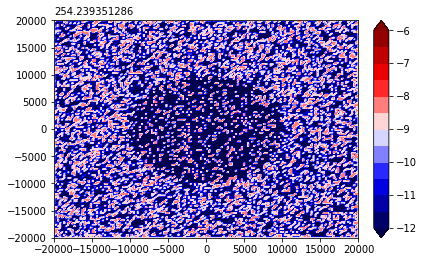

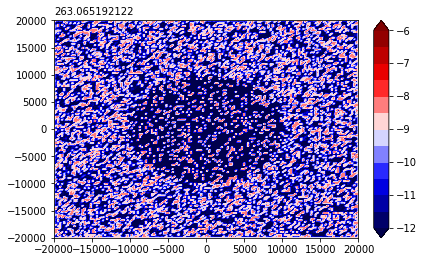

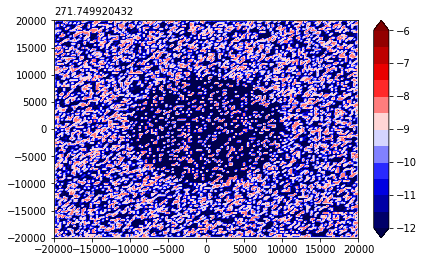

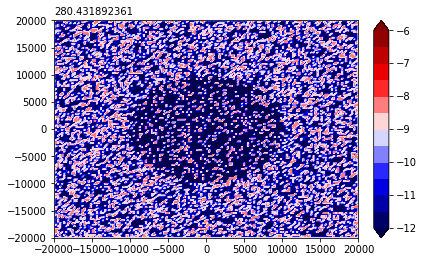

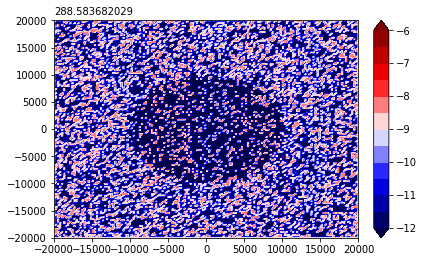

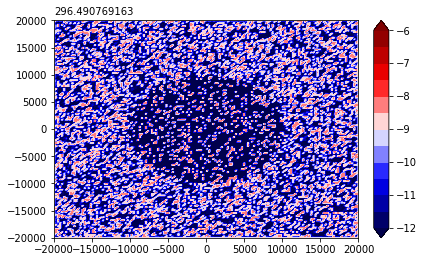

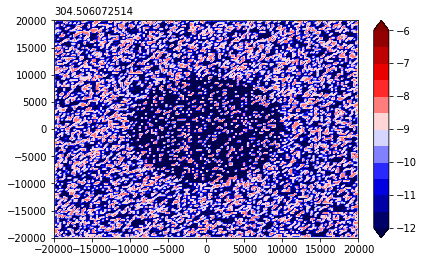

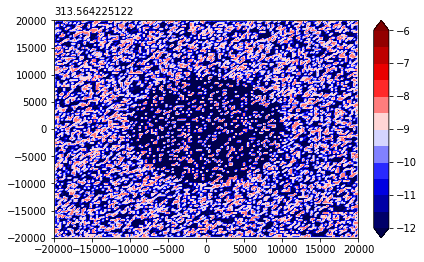

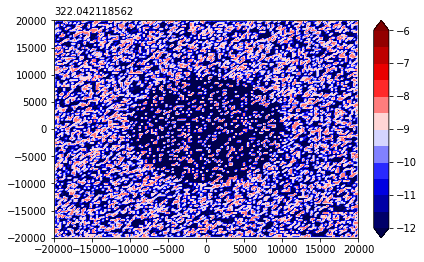

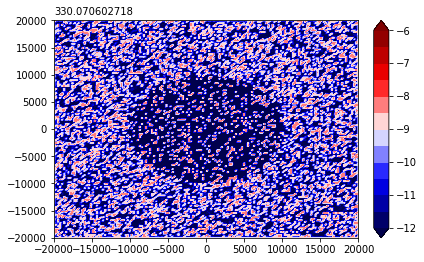

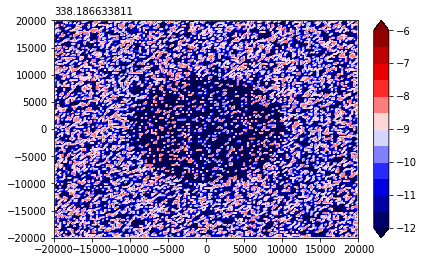

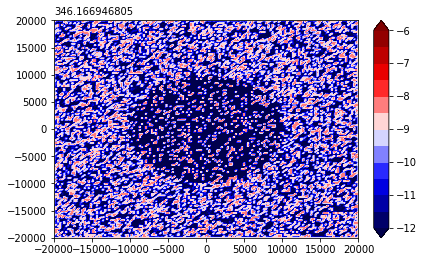

In [20]:
for i in range(0, 10000, 200):
    slip, slip_deficit, state, traction, V, dstatedt = solve_for_full_state(
        qdm, qd_cfg, slip_to_traction, t[i], y[i]
    )
    field = np.log10(np.abs(V.reshape(-1,3)[:,0]))
    levels = np.linspace(-12, -6, 13)

    #     slip, state = separate_slip_state(y[i])
    #     field = state
    #     levels = np.linspace(0.3, 0.9, 13)

    fig, ax = plt.subplots()
    pt_field = np.empty((qdm.m.pts.shape[0]))
    pt_field[qdm.m.tris] = field.reshape((-1, 3))
    cmap = 'seismic'
    ax.clear()
    cntf = ax.tricontourf(
        qdm.m.pts[:,0], qdm.m.pts[:,2], qdm.m.tris, pt_field, 
        levels = levels, cmap = cmap, extend = 'both'
    )

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')
    cax.clear()
    fig.colorbar(cntf, cax=cax)
    ax.text(-20000, 21000, '%.9f' % t_years[i])
    plt.show()

In [ ]:
#https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
#https://stackoverflow.com/questions/23070305/how-can-i-make-an-animation-with-contourf
#http://tiao.io/posts/notebooks/save-matplotlib-animations-as-gifs/
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.writer'] = 'imagemagick'
fig, ax = plt.subplots(figsize = (7,6))
fig.subplots_adjust(top=0.8)
from mpl_toolkits.axes_grid1 import make_axes_locatable
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

def animate(i):

    slip, slip_deficit, state, traction, V, dstatedt = solve_for_full_state(
        qdm, qd_cfg, slip_to_traction, t[i], y[i]
    )
    
    field = np.log10(np.abs(V.reshape(-1,3)[:,0]))
    levels = np.linspace(-12, -6, 13)
    
#     slip, state = separate_slip_state(y[i])
#     field = state
#     levels = np.linspace(0.3, 0.9, 13)
    
    
    pt_field = np.empty((qdm.m.pts.shape[0]))
    pt_field[qdm.m.tris] = field.reshape((-1, 3))
    cmap = 'seismic'
    ax.clear()
    cntf = ax.tricontourf(
        qdm.m.pts[:,0], qdm.m.pts[:,2], qdm.m.tris, pt_field, 
        levels = levels, cmap = cmap, extend = 'both'
    )
    cax.clear()
    fig.colorbar(cntf, cax=cax)
    ax.text(-20000, 21000, '%.9f' % t_years[i])
    return ax

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames = len(t), interval = 100, blit=False)
anim.save('Vyay.gif', dpi = 100)

In [ ]:
animate(100)